<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220302_cv2_keypoints(GFTT_FAST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload(
)

Saving matching.jpg to matching.jpg


{'matching.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xab\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\x07\x08\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf1\xcb+)m\xd4]\xbc\xe3\xed\xb

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 특징점 검출기(GFTT, FAST)
# 특징 디스크립터 검출기(SIFT, SURF, ORB)

# GFTT(Good Feature to Track)

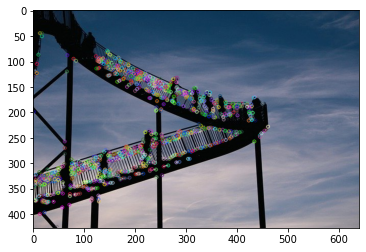

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Good Feature to Track Detector (GFTTD) 검출기 생성
gftt = cv2.GFTTDetector_create()
# 특징점 검출
keypoints = gftt.detect(img_gray, None) # len(keypoints) : 1000, list type
# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

# 결과 출력
plt.imshow(img_draw[:,:,::-1])

# Fast

791

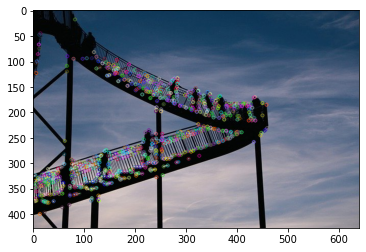

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Fast 특징 검출기
fast = cv2.FastFeatureDetector_create(50) # threshold(코너판단 임계값) default : 10
# 특징점 검출
keypoints = fast.detect(img_gray, None)
# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_draw[:,:,::-1])
len(keypoints)


### Fast(threshold 변화에 따른 keypoints 변화)

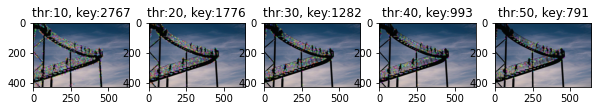

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

test_val = list(range(10, 60, 10))
plt.figure(figsize=(10, 5))
for idx, val in enumerate(test_val):
  # Fast 특징 검출기
  fast = cv2.FastFeatureDetector_create(val) # threshold(코너판단 임계값) default : 10
  # 특징점 검출
  keypoints = fast.detect(img_gray, None)
  # 특징점 그리기
  img_draw = cv2.drawKeypoints(img, keypoints, None)
  
  plt.subplot(1, len(test_val), idx+1)
  plt.title("thr:{}, key:{}".format(val, len(keypoints)))
  plt.imshow(img_draw[:,:,::-1])


  

In [56]:
cv2.__version__

'4.1.2'

# SURF(Speeded Up Robust Features)

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt